<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass4/hpdp/DEADPOOL/deadpool_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Feature Engineering (for machine learning)
### Group Members

| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
|MUHAMMAD AMIR JAMIL BIN JAMLUS          | A21EC0202     | Main Code(Preprocess, EDA , Feature Engineering)   |
|KEE SHIN PEARL         | A21EC0190     | Verify   |
|MUHAMMAD IZZUDDIN BIN SHABRIN           | A21EC0083   | Verify    |
|UMAR HAZIQ BIN MUHAMAD NORHISHAM            |  A21EC0235   | Finding data     |

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading the data into pandas dataframe

In [ ]:
originaldata = pd.read_csv('spotify_data.csv')
originaldata

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


Making a copy so that we dont apply any changes to the original data

In [ ]:
data = originaldata.copy()

preprocess: removing unwanted columns

In [ ]:
drop_cols = ['Unnamed: 0']
data.drop(drop_cols, axis=1, inplace=True)
data

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


studying the structure of our data and changing data types as we go

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  

In [ ]:
data['year'] = pd.to_datetime(data['year'], format='%Y')
data['year'] = data['year'].dt.year
data['popularity'] = data['popularity'].astype('int32')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int32  
 4   year              1159764 non-null  int32  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  

In [ ]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.describe()

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06,1.159748e+06
mean,1.838309e+01,2.011955e+03,5.374425e-01,6.396737e-01,5.287763e+00,-8.981292e+00,6.346560e-01,9.281520e-02,3.215380e-01,2.523423e-01,2.230197e-01,4.555689e-01,1.213775e+02,2.495587e+05,3.885880e+00
std,1.588563e+01,6.803908e+00,1.844753e-01,2.704993e-01,3.555204e+00,5.682203e+00,4.815267e-01,1.268416e-01,3.549873e-01,3.650701e-01,2.010712e-01,2.685169e-01,2.977964e+01,1.494243e+05,4.676983e-01
min,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,5.000000e+00,2.006000e+03,4.130000e-01,4.540000e-01,2.000000e+00,-1.082900e+01,0.000000e+00,3.710000e-02,6.400000e-03,1.050000e-06,9.790000e-02,2.260000e-01,9.879800e+01,1.810910e+05,4.000000e+00
50%,1.500000e+01,2.012000e+03,5.500000e-01,6.940000e-01,5.000000e+00,-7.450000e+00,1.000000e+00,5.070000e-02,1.470000e-01,1.760000e-03,1.340000e-01,4.380000e-01,1.219310e+02,2.257405e+05,4.000000e+00
75%,2.900000e+01,2.018000e+03,6.770000e-01,8.730000e-01,8.000000e+00,-5.276000e+00,1.000000e+00,8.900000e-02,6.400000e-01,6.140000e-01,2.920000e-01,6.740000e-01,1.399030e+02,2.869070e+05,4.000000e+00
max,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.710000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


In [ ]:
data

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


## EXPLORATORY DATA ANALYSIS (EDA)

performing EDA to further study the relations hidden among our data

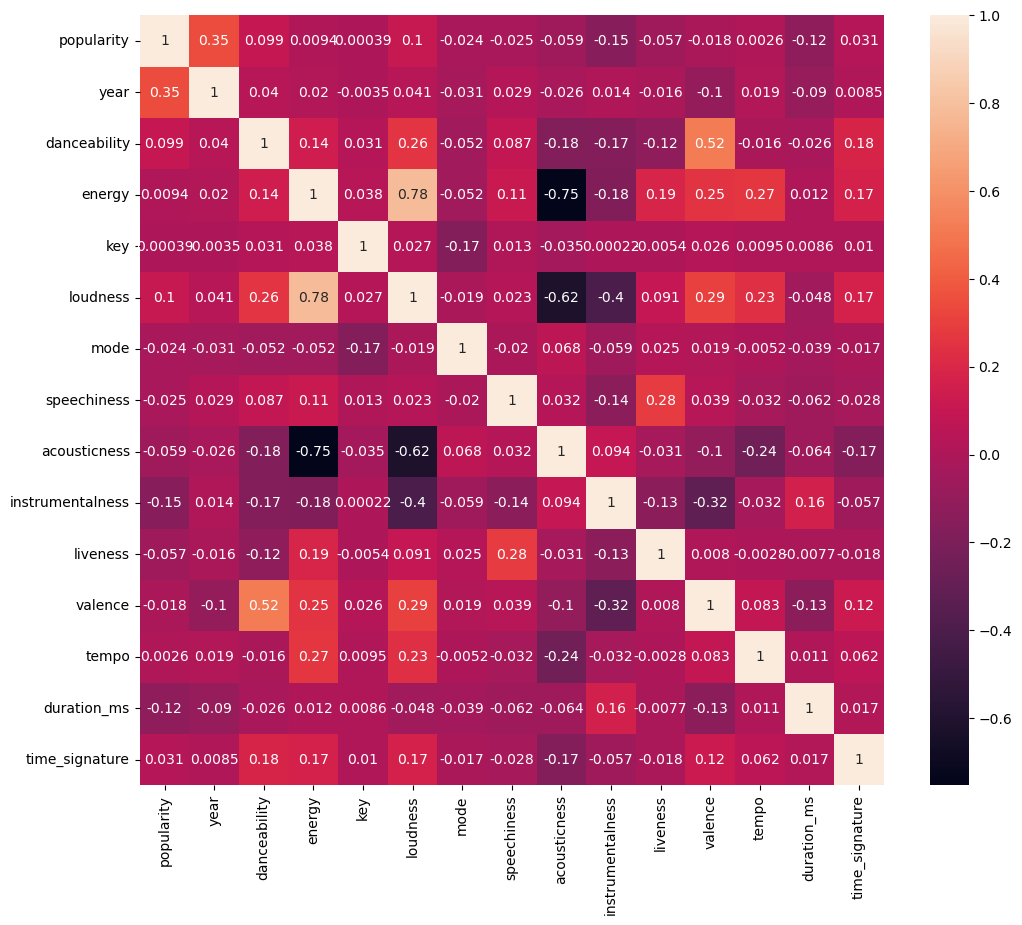

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

c:\Users\amirj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


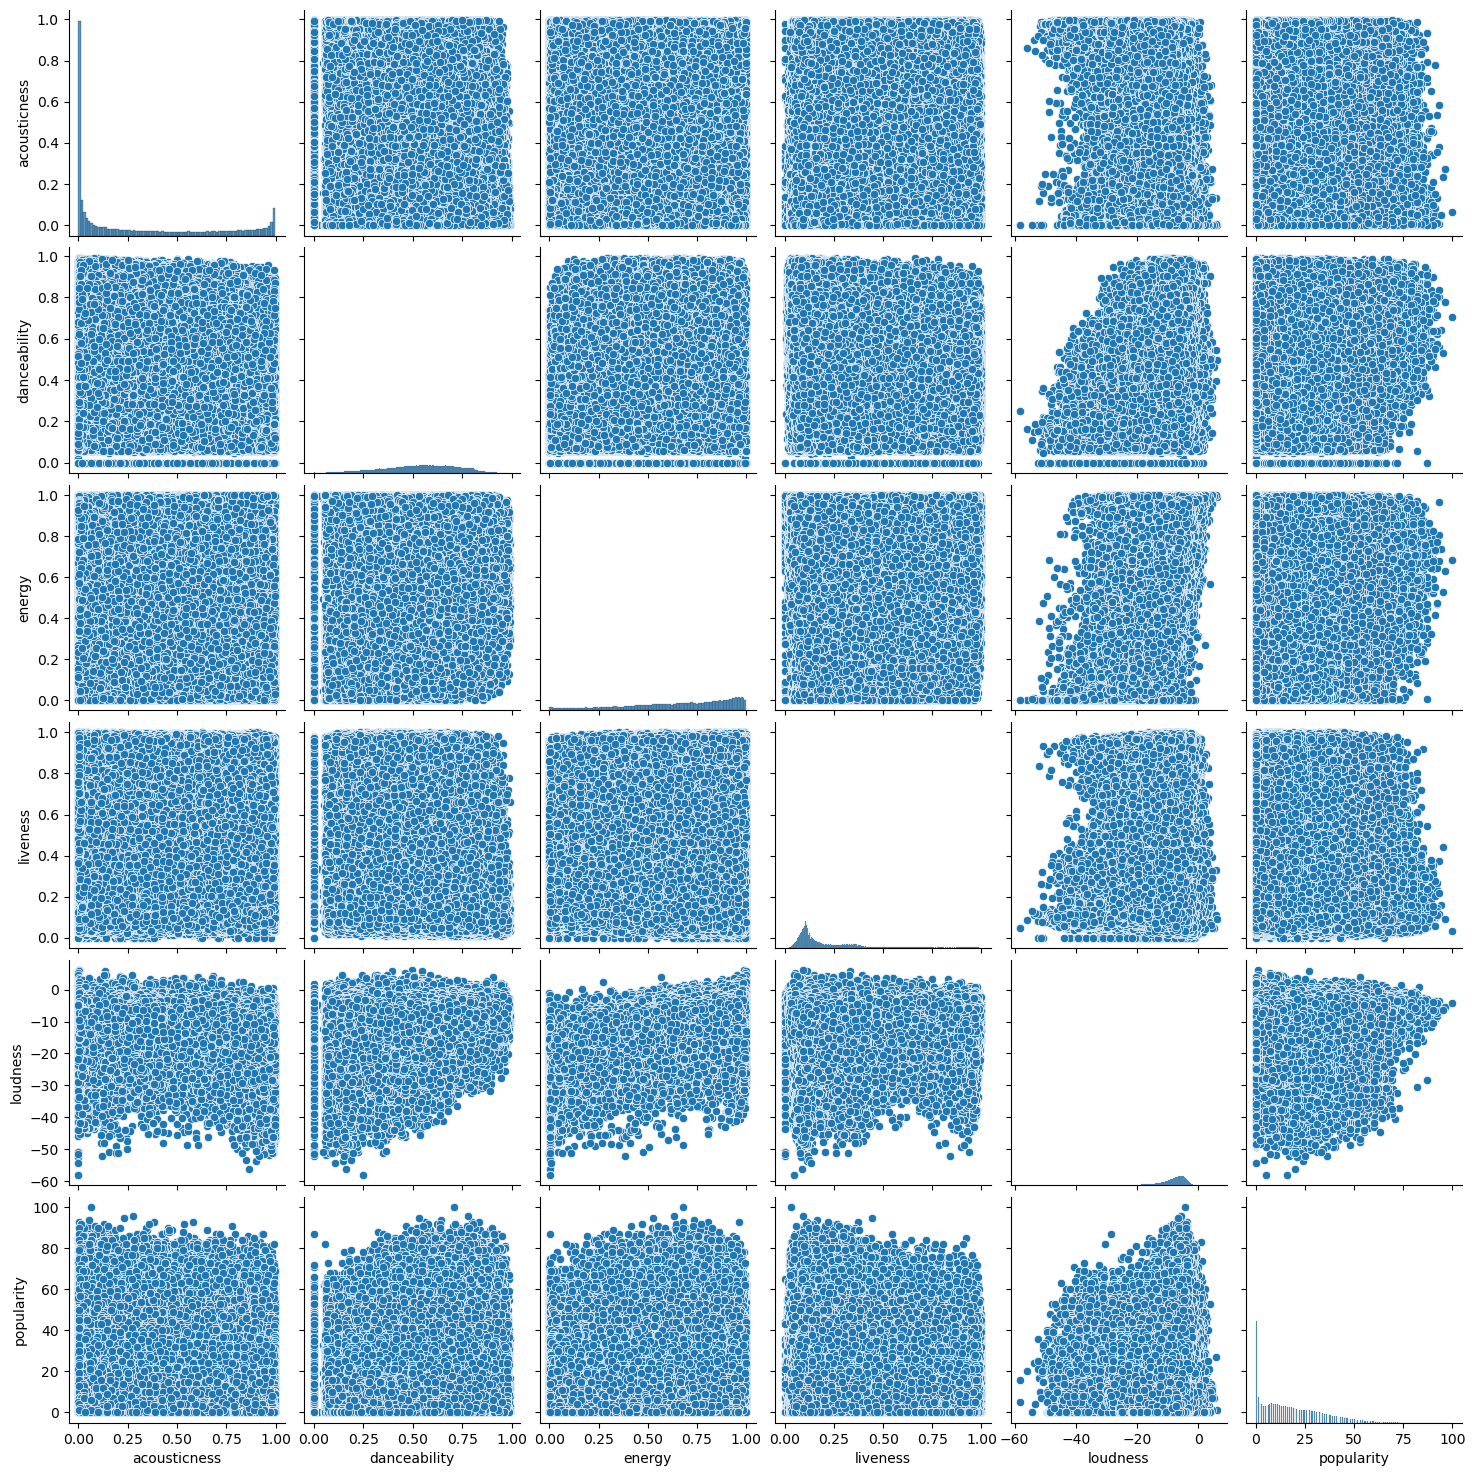

In [ ]:
sns.pairplot(data,
             vars=['acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'popularity'] ,
             )
plt.show()

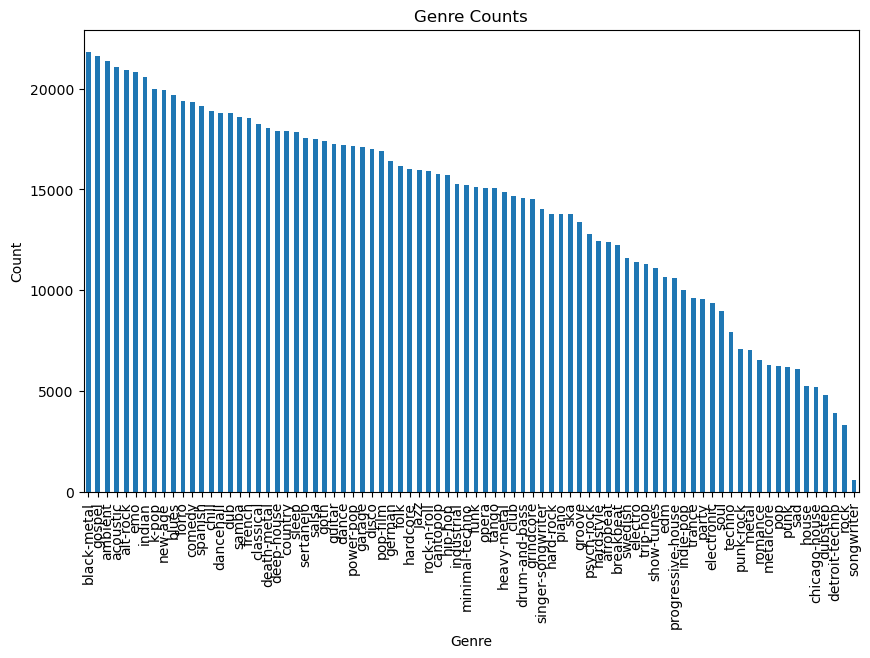

In [ ]:
genre_counts = data['genre'].value_counts()

plt.figure(figsize=(10,6))
genre_counts.plot.bar()
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

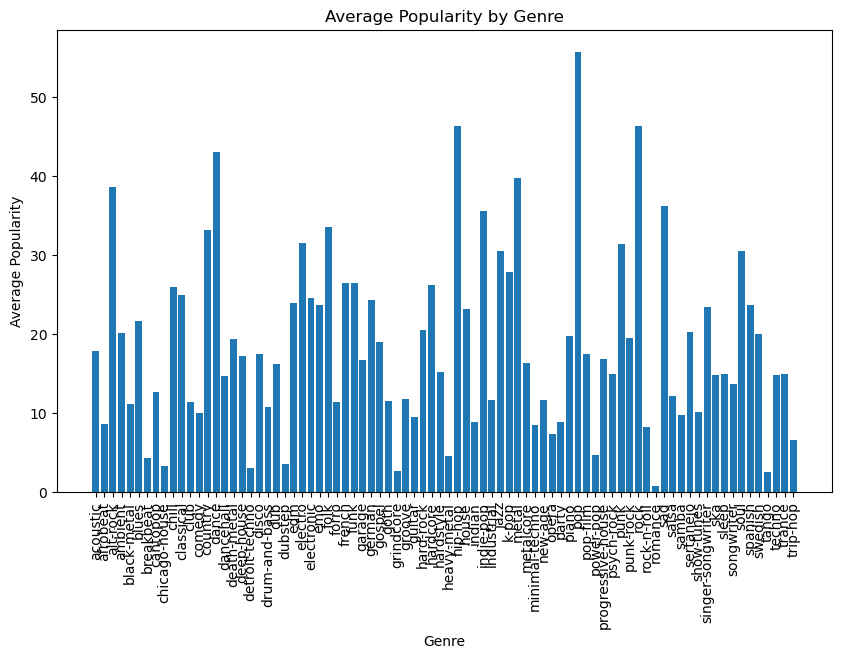

In [ ]:
average_popularity = data.groupby('genre')['popularity'].mean()

average_popularity = average_popularity.reset_index()

plt.figure(figsize=(10,6))
plt.bar(average_popularity['genre'], average_popularity['popularity'])
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

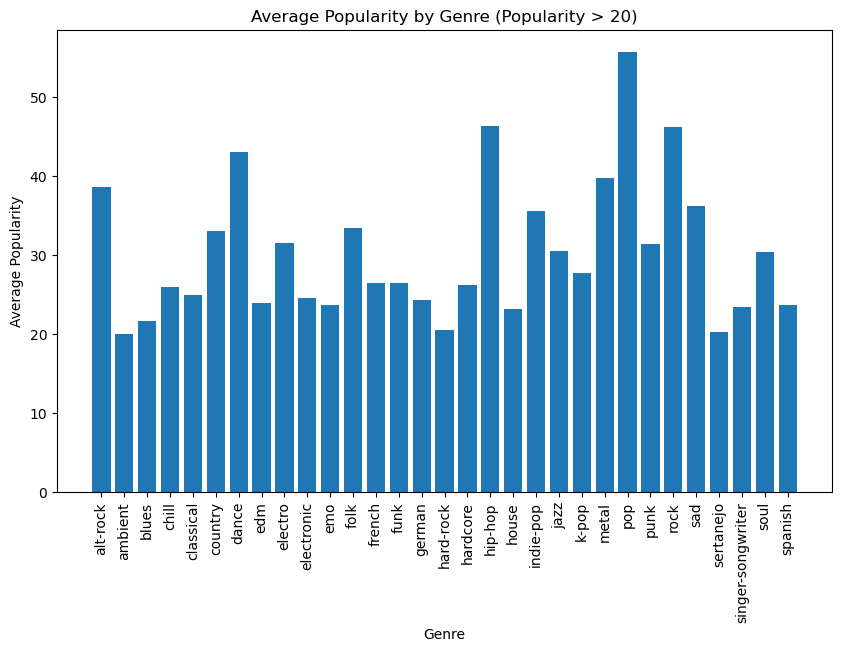

In [ ]:
filtered_popularity = average_popularity[average_popularity['popularity'] > 20]

plt.figure(figsize=(10,6))
plt.bar(filtered_popularity['genre'], filtered_popularity['popularity'])
plt.title('Average Popularity by Genre (Popularity > 20)')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)
plt.show()

separating into Train and Test dataset

In [ ]:
data = data.sample(frac=1, random_state= 2)
traindata = data.iloc[:int(0.8*len(data))]
traindata = traindata.reset_index(drop=True)

testdata = data.iloc[int(0.8*len(data)):]
testdata = testdata.reset_index(drop=True)

traindata

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Ghulam Ali,Faasle Aise Bhi Honge,7ozo60uVwVRru34UQcDwBt,22,2020,pop-film,0.332,0.5290,1,-10.726,1,0.0374,0.10500,0.000470,0.2940,0.5690,139.693,451196,1
1,Carmen Miranda,Não Vá Simbora,5aiqNZTFQZm4m9q33Pm3Py,1,2023,samba,0.618,0.3260,0,-10.656,1,0.0736,0.93300,0.848000,0.1200,0.6360,88.322,182022,4
2,Odd Mob,Belter (feat. Biggs),3Vn1Mdz3qh1iBN9HD1dndV,19,2017,deep-house,0.784,0.7940,1,-6.089,1,0.4920,0.00197,0.035500,0.0839,0.1300,126.062,250000,4
3,JJ Hairston,After This,4grDi6GUJyv75EXDgLtTFR,28,2012,gospel,0.610,0.9120,1,-6.221,1,0.1230,0.03470,0.000000,0.9740,0.6770,141.477,400040,4
4,Montrose,Shoot Us Down - Demo,2gVNHqgqYEgkgKrvdiD30K,18,2017,blues,0.511,0.7020,9,-10.355,1,0.0318,0.03100,0.000009,0.2910,0.5290,105.265,271853,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927793,Fractal,Omni,5ISOQDi992hTz8EgVLDFuj,13,2015,dub,0.681,0.9150,2,-4.022,1,0.0779,0.02130,0.061400,0.4430,0.5550,127.052,283771,4
927794,aya,what if i should fall asleep and slipp under,4DgCkBTgSXTs1zsvSwztaE,18,2021,club,0.663,0.4790,11,-13.327,1,0.3680,0.43700,0.000000,0.3630,0.3650,135.853,146612,4
927795,Jamie Kilstein,Opener of a Failed Comedian,2jSL2CXTZyJGiBnzb7vcOB,14,2013,comedy,0.658,0.7700,0,-6.061,1,0.8810,0.59100,0.000000,0.9720,0.7500,101.819,123840,3
927796,Claude-Michel Schönberg,The Departure,2u1YemjD4Zlah914SIKzEp,0,2003,show-tunes,0.305,0.0872,2,-18.002,1,0.0391,0.94000,0.651000,0.0742,0.0399,124.675,449293,4


In [ ]:
testdata

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Enoch Daniels,Pyar Kar Liya To Kya - Instrumental,7CcdmovvPr3Fk1pAW6rMVT,1,2009,indian,0.258,0.312,3,-13.870,1,0.0343,0.453000,0.1620,0.0930,0.504,82.373,222680,4
1,Dario G,Destination Calling,0TcwOkiDN3RGkrZ54hD99d,2,2001,trance,0.493,0.583,4,-10.193,0,0.0322,0.000154,0.5820,0.1010,0.191,89.916,277907,4
2,Mystic Diversions,Cygne Noir,5j6cxekUWkKUwNpuTxhszG,5,2004,chill,0.757,0.805,2,-8.661,1,0.0334,0.141000,0.8320,0.1150,0.627,136.012,398237,4
3,GusGus,Co2,3smwi7dYT65caEq3ifaAYo,5,2019,trip-hop,0.805,0.957,10,-8.859,0,0.0424,0.076600,0.8300,0.0672,0.222,121.002,412308,4
4,Lord Of The Lost,Go to Hell,1BwYp3nYDGhuX8GtU4vsmK,22,2014,goth,0.466,0.862,5,-4.645,0,0.0383,0.045500,0.0871,0.3220,0.388,90.024,239293,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231945,Dwijen Mukherjee,Klanti Aamar Khama,1xATVY0DX9pS7RD1gWTlFl,0,2010,pop-film,0.449,0.392,11,-9.543,1,0.0308,0.801000,0.0104,0.1100,0.239,127.601,235707,3
231946,Shoes,The Things You Do,38wvEzHtCXRsgbF1JlQBFq,0,2007,power-pop,0.536,0.790,9,-7.499,1,0.0368,0.101000,0.0000,0.2620,0.838,144.008,177533,4
231947,Coolio,It's All the Way Live (Now) - Rerecorded,6kxBUPsvQTghJklURMpztO,20,2011,funk,0.893,0.453,10,-3.480,0,0.0895,0.001180,0.0011,0.1010,0.920,109.999,226947,4
231948,Antonio y Joel Con Labranza,Merecedor de Alabanza,0QYKdZ2I46CN6ndYnZh3w9,19,2015,salsa,0.679,0.679,10,-4.709,0,0.0793,0.638000,0.0000,0.3110,0.614,100.030,198277,4


 Get observed outputs for train and test


In [ ]:
y_train = traindata['popularity'].to_numpy()
y_test = testdata['popularity'].to_numpy()

y_train.shape , y_test.shape

((927798,), (231950,))

Get error of baseline model that uses the average median_house_value in train_df


In [ ]:
from sklearn.metrics import mean_absolute_error

average_popularity = traindata['popularity'].mean()
baseline_model = [average_popularity] * len(testdata)

mean_absolute_error(baseline_model , y_test)

13.107873271975873

## 1. Dimensionality Reduction (PCA)

observe the correlation between danceability, energy and accousticness

In [ ]:
traindata[['danceability', 'energy', 'loudness']].corr()

,danceability,energy,loudness
danceability,1.000000,0.138804,0.256915
energy,0.138804,1.000000,0.780994
loudness,0.256915,0.780994,1.000000


 Get X_train_3 which has total_rooms, total_bedrooms, and households as inputs


In [ ]:
x_train_3 = traindata[['danceability', 'energy', 'loudness']].to_numpy()
x_train_3.shape

(927798, 3)

Get X_test_3 which has total_rooms, total_bedrooms, and households as inputs


In [ ]:
x_test_3 = testdata[['danceability', 'energy', 'loudness']].to_numpy()
x_test_3.shape

(231950, 3)

Get error of random forest training on just (X_train_3, y_train) and testing on (X_test_3, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_base = RandomForestRegressor(n_estimators=50, max_depth=5).fit(x_train_3, y_train)
forest_base_test_pred = forest_base.predict(x_test_3)
mean_absolute_error(y_test , forest_base_test_pred)

12.604367996878628

Train PCA (Linear Dimensionality Reduction) with 2-feature output

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit(x_train_3)

pca

PCA(n_components=2)

Use PCA to transform X_train_3 and X_test_3 into X_train_pca and X_test_pca

In [ ]:
x_train_pca = pca.transform(x_train_3)
x_test_pca = pca.transform(x_test_3)

x_train_pca.shape , x_test_pca.shape

((927798, 2), (231950, 2))

Get error of Random Forest training on (X_train_pca, y_train) and testing on (X_test_pca, y_test)

In [ ]:
forest_pca = RandomForestRegressor(n_estimators=50, max_depth=5).fit(x_train_pca, y_train)
forest_pca_test_pred = forest_pca.predict(x_test_pca)

mean_absolute_error(y_test , forest_pca_test_pred)

12.714652584517513

## 2. Preprocessing / Scaling


In [ ]:
x_train_3

array([[  0.332 ,   0.529 , -10.726 ],
       [  0.618 ,   0.326 , -10.656 ],
       [  0.784 ,   0.794 ,  -6.089 ],
       ...,
       [  0.658 ,   0.77  ,  -6.061 ],
       [  0.305 ,   0.0872, -18.002 ],
       [  0.693 ,   0.731 ,  -6.723 ]])

Test different preprocessing functions on X_train_3

(array([  7551.,  35922.,  66408., 101593., 152812., 184112., 177789.,
        133900.,  59757.,   7954.]),
 array([-2.91446357, -2.37601693, -1.83757029, -1.29912365, -0.76067701,
        -0.22223037,  0.31621627,  0.85466291,  1.39310955,  1.93155619,
         2.47000283]),
 <BarContainer object of 10 artists>)

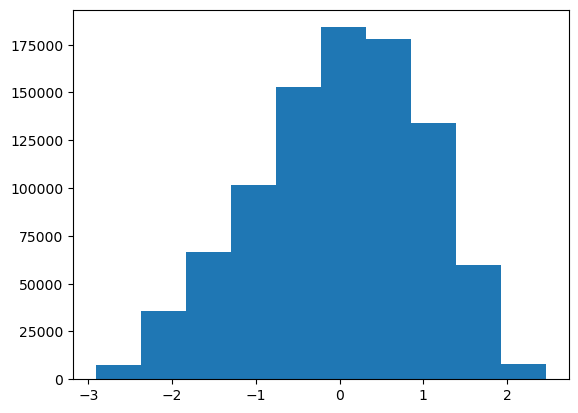

In [ ]:
from sklearn.preprocessing import StandardScaler , Normalizer , MinMaxScaler

scaler = StandardScaler().fit(x_train_3)
x_train_3_scaled = scaler.transform(x_train_3)

plt.hist(x_train_3_scaled[:,0])

Preprocess X_test_3

In [ ]:
x_test_3_scaled = scaler.transform(x_test_3)
x_test_3_scaled.shape

(231950, 3)

Get error of Random Forest training on (X_train_scaled, y_train) and testing on (X_test_scaled, y_test)

In [ ]:
random_forest_scaled = RandomForestRegressor(n_estimators=50, max_depth=5).fit(x_train_3_scaled, y_train)
random_forest_scaled_test_pred = random_forest_scaled.predict(x_test_3_scaled)

mean_absolute_error(y_test , random_forest_scaled_test_pred)

12.605088530478008

Create Pipeline of Normalization -> PCA -> RandomForest


In [ ]:
from sklearn.pipeline import Pipeline

scale_pca_pipe_forest = Pipeline(steps = [('scaler', Normalizer()), ('pca', PCA(n_components=2)), ('forest', RandomForestRegressor(n_estimators=50, max_depth=5))])

scale_pca_pipe_forest

Pipeline(steps=[('scaler', Normalizer()), ('pca', PCA(n_components=2)),
                ('forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

Get error of Normalization -> PCA -> Random Forest pipeline

In [ ]:
scale_pca_pipe_forest.fit(x_train_3, y_train)
scale_pca_pipe_forest_test_pred = scale_pca_pipe_forest.predict(x_test_3)

mean_absolute_error(y_test , scale_pca_pipe_forest_test_pred)

12.967773485562038

## 3. Categorical Encoding (Dummy / One-Hot)

Get dummy variables (one-hot encoding) for the training set

In [ ]:
train_dummies = pd.get_dummies(traindata['genre'])
train_dummies.head()

,acoustic,afrobeat,alt-rock,ambient,black-metal,blues,breakbeat,cantopop,chicago-house,chill,...,ska,sleep,songwriter,soul,spanish,swedish,tango,techno,trance,trip-hop
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Concatenate dummy variables to the training DataFrame

In [ ]:
traindata = pd.concat([traindata, train_dummies], axis=1)
traindata.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,ska,sleep,songwriter,soul,spanish,swedish,tango,techno,trance,trip-hop
0,Ghulam Ali,Faasle Aise Bhi Honge,7ozo60uVwVRru34UQcDwBt,22,2020,pop-film,0.332,0.529,1,-10.726,...,False,False,False,False,False,False,False,False,False,False
1,Carmen Miranda,Não Vá Simbora,5aiqNZTFQZm4m9q33Pm3Py,1,2023,samba,0.618,0.326,0,-10.656,...,False,False,False,False,False,False,False,False,False,False
2,Odd Mob,Belter (feat. Biggs),3Vn1Mdz3qh1iBN9HD1dndV,19,2017,deep-house,0.784,0.794,1,-6.089,...,False,False,False,False,False,False,False,False,False,False
3,JJ Hairston,After This,4grDi6GUJyv75EXDgLtTFR,28,2012,gospel,0.610,0.912,1,-6.221,...,False,False,False,False,False,False,False,False,False,False
4,Montrose,Shoot Us Down - Demo,2gVNHqgqYEgkgKrvdiD30K,18,2017,blues,0.511,0.702,9,-10.355,...,False,False,False,False,False,False,False,False,False,False


Observe frequency of categories

In [ ]:
traindata['genre'].value_counts()

genre
black-metal       17483
gospel            17290
ambient           17050
acoustic          16905
alt-rock          16767
                  ...  
chicago-house      4158
dubstep            3811
detroit-techno     3142
rock               2660
songwriter          470
Name: count, Length: 82, dtype: int64

Drop the songwriter dummy since there are very few of them

In [ ]:
traindata.drop(['songwriter'], axis=1, inplace=True)
traindata.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,singer-songwriter,ska,sleep,soul,spanish,swedish,tango,techno,trance,trip-hop
0,Ghulam Ali,Faasle Aise Bhi Honge,7ozo60uVwVRru34UQcDwBt,22,2020,pop-film,0.332,0.529,1,-10.726,...,False,False,False,False,False,False,False,False,False,False
1,Carmen Miranda,Não Vá Simbora,5aiqNZTFQZm4m9q33Pm3Py,1,2023,samba,0.618,0.326,0,-10.656,...,False,False,False,False,False,False,False,False,False,False
2,Odd Mob,Belter (feat. Biggs),3Vn1Mdz3qh1iBN9HD1dndV,19,2017,deep-house,0.784,0.794,1,-6.089,...,False,False,False,False,False,False,False,False,False,False
3,JJ Hairston,After This,4grDi6GUJyv75EXDgLtTFR,28,2012,gospel,0.610,0.912,1,-6.221,...,False,False,False,False,False,False,False,False,False,False
4,Montrose,Shoot Us Down - Demo,2gVNHqgqYEgkgKrvdiD30K,18,2017,blues,0.511,0.702,9,-10.355,...,False,False,False,False,False,False,False,False,False,False


Get dummy variables (one-hot encoding) for the test set

In [ ]:
test_dummies = pd.get_dummies(testdata['genre'])
test_dummies.head()

,acoustic,afrobeat,alt-rock,ambient,black-metal,blues,breakbeat,cantopop,chicago-house,chill,...,ska,sleep,songwriter,soul,spanish,swedish,tango,techno,trance,trip-hop
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Append the dummies and drop songwriter on the test DataFrame

In [ ]:
test_dummies = pd.get_dummies(testdata['genre'])
testdata = pd.concat([testdata, test_dummies], axis=1)
testdata.drop(['songwriter'], axis=1, inplace=True)
testdata.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,singer-songwriter,ska,sleep,soul,spanish,swedish,tango,techno,trance,trip-hop
0,Enoch Daniels,Pyar Kar Liya To Kya - Instrumental,7CcdmovvPr3Fk1pAW6rMVT,1,2009,indian,0.258,0.312,3,-13.870,...,False,False,False,False,False,False,False,False,False,False
1,Dario G,Destination Calling,0TcwOkiDN3RGkrZ54hD99d,2,2001,trance,0.493,0.583,4,-10.193,...,False,False,False,False,False,False,False,False,True,False
2,Mystic Diversions,Cygne Noir,5j6cxekUWkKUwNpuTxhszG,5,2004,chill,0.757,0.805,2,-8.661,...,False,False,False,False,False,False,False,False,False,False
3,GusGus,Co2,3smwi7dYT65caEq3ifaAYo,5,2019,trip-hop,0.805,0.957,10,-8.859,...,False,False,False,False,False,False,False,False,False,True
4,Lord Of The Lost,Go to Hell,1BwYp3nYDGhuX8GtU4vsmK,22,2014,goth,0.466,0.862,5,-4.645,...,False,False,False,False,False,False,False,False,False,False


Make X_train_dummies using only dummies

In [ ]:
x_train_dummies = traindata.to_numpy()[:, -4:]
x_train_dummies.shape

(927798, 4)

Make X_test_dummies using only dummies

In [ ]:
x_test_dummies = testdata.to_numpy()[:, -4:]
x_test_dummies.shape

(231950, 4)

Check error of linear regression model using only dummies

In [ ]:
from sklearn.linear_model import LinearRegression

linear_dummy = LinearRegression().fit(x_train_dummies, y_train)
linear_dummy_test_pred = linear_dummy.predict(x_test_dummies)

mean_absolute_error(y_test , linear_dummy_test_pred)

12.911787294093546

## 4. Binning (Grouping, Aggregating)

<Axes: >

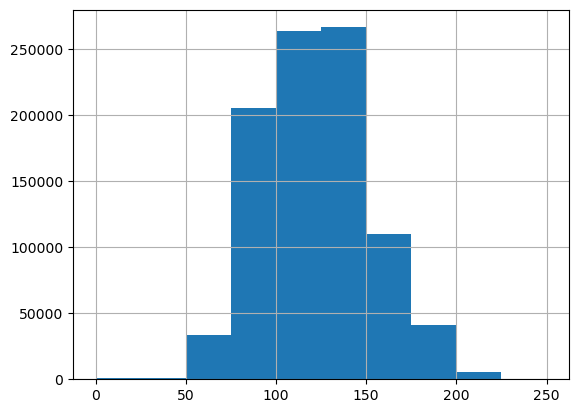

In [ ]:
traindata['tempo'].hist()

Add new binary column to training DataFrame where median_tempo < 125

In [ ]:
traindata['median_tempo_lessthan125'] = (traindata['tempo'] < 125).astype(int)
traindata.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,ska,sleep,soul,spanish,swedish,tango,techno,trance,trip-hop,median_tempo_lessthan125
0,Ghulam Ali,Faasle Aise Bhi Honge,7ozo60uVwVRru34UQcDwBt,22,2020,pop-film,0.332,0.529,1,-10.726,...,False,False,False,False,False,False,False,False,False,0
1,Carmen Miranda,Não Vá Simbora,5aiqNZTFQZm4m9q33Pm3Py,1,2023,samba,0.618,0.326,0,-10.656,...,False,False,False,False,False,False,False,False,False,1
2,Odd Mob,Belter (feat. Biggs),3Vn1Mdz3qh1iBN9HD1dndV,19,2017,deep-house,0.784,0.794,1,-6.089,...,False,False,False,False,False,False,False,False,False,0
3,JJ Hairston,After This,4grDi6GUJyv75EXDgLtTFR,28,2012,gospel,0.610,0.912,1,-6.221,...,False,False,False,False,False,False,False,False,False,0
4,Montrose,Shoot Us Down - Demo,2gVNHqgqYEgkgKrvdiD30K,18,2017,blues,0.511,0.702,9,-10.355,...,False,False,False,False,False,False,False,False,False,1


Setup X_train_median_tempo which only uses the binary indicator

In [ ]:
X_train_median_tempo = traindata['median_tempo_lessthan125'].to_numpy().reshape(-1, 1)
X_train_median_tempo

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

Setup X_train_median_tempo which only uses the binary indicator

In [ ]:
testdata['median_tempo_lessthan125'] = (testdata['tempo'] < 30).astype(int)
X_test_median_tempo = testdata['median_tempo_lessthan125'].to_numpy().reshape(-1, 1)
X_test_median_tempo.shape

(231950, 1)

Check error of linear model that only uses the binary variable

In [ ]:
linear_median_tempo = LinearRegression().fit(X_train_median_tempo, y_train)
linear_median_tempo_test_predictions = linear_median_tempo.predict(X_test_median_tempo)
mean_absolute_error(y_test, linear_median_tempo_test_predictions)

13.06840082569376

## 5. Feature Selection

Observe shapes of X_train_clustering, X_train_scaled and dummy_X_train

In [ ]:
x_train_3_scaled.shape, x_train_dummies.shape

((927798, 3), (927798, 4))

Concatenate the training arrays side-by-side to make one big X_train_full input matrix

In [ ]:
X_train_full = np.concatenate([ x_train_3_scaled, x_train_dummies], axis=1)
X_train_full

array([[-1.11421901801477, -0.409686067303611, -0.30785073941262153, ...,
        False, False, False],
       [0.4365940641623785, -1.160364394250882, -0.29552310240822055,
        ..., False, False, False],
       [1.3367163426288355, 0.5702634727999691, 0.5087671575789083, ...,
        False, False, False],
       ...,
       [0.6534909987326093, 0.4815133257717203, 0.5136982123806688, ...,
        False, False, False],
       [-1.2606244488496756, -2.0434283571819574, -1.589220551470066,
        ..., False, False, False],
       [0.8432758164815606, 0.3372943368508159, 0.3971139881390487, ...,
        False, False, False]], dtype=object)

Observe shapes of X_test_clustering, X_test_scaled and dummy_X_test

In [ ]:
x_test_3_scaled.shape, x_test_dummies.shape

((231950, 3), (231950, 4))

Concatenate the test arrays side-by-side to make one big X_train_full input matrix

In [ ]:
X_test_full = np.concatenate([ x_test_3_scaled, x_test_dummies], axis=1)
X_test_full

array([[-1.5154783469696964, -1.2121353133506936, -0.8615377500102857,
        ..., False, False, False],
       [-0.241208856369592, -0.20999823649005153, -0.21398458907911141,
        ..., False, True, False],
       [1.19031091179393, 0.6109406235212499, 0.05581455221720597, ...,
        False, False, False],
       ...,
       [1.9277604893327138, -0.6907281995597321, 0.9682357996429372, ...,
        False, False, False],
       [0.7673618893819805, 0.14500235162294384, 0.7517977156656696, ...,
        False, False, False],
       [-0.539442141403659, -0.30984215189683106, 0.8921566684157772,
        ..., False, False, False]], dtype=object)

Check error of a random forest that uses the combination of these features

In [ ]:
random_forest_final = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_full, y_train)
random_forest_final_test_pred = random_forest_final.predict(X_test_full)

mean_absolute_error(random_forest_final_test_pred , y_test)

12.497781454701395